# Crime_Suburbs_R

## Note: Must run Suburbs_Julia code first before running this jupyter notebook, otherwise this notebook will not run.

Import libraries

In [1]:
library(tidyverse)
library(visdat)
library(skimr)

Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'visdat' was built under R version 4.0.5"
Warning message:
"package 'skimr' was built under R version 4.0.5"


Read the Victimisation Time and Place dataset csv file "VICTIM_TIMEPLACE_Migrated_Data_new.csv" as a tibble and name the tibble "victim_timeplace".

In [2]:
victim_timeplace <- read_csv(file = "VICTIM_TIMEPLACE_Migrated_Data_new.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  `Month Year` = col_character(),
  `ANZSOC Division` = col_character(),
  `ANZSOC Group` = col_character(),
  `ANZSOC Subdivision` = col_character(),
  `Area Unit` = col_character(),
  `Location Type` = col_character(),
  `Locn Type Division` = col_character(),
  Meshblock = col_double(),
  `Occurrence Day Of Week` = col_character(),
  `Occurrence Hour Of Day` = col_double(),
  `Table 1` = col_character(),
  `Territorial Authority` = col_character(),
  Weapon = col_character(),
  `Year Month` = col_character(),
  `Year Month (copy 2)` = col_character(),
  `Number of Records` = col_double(),
  Victimisations = col_double()
)




Look at first few rows of victim_timeplace tibble.

In [3]:
head(victim_timeplace)

Month Year,ANZSOC Division,ANZSOC Group,ANZSOC Subdivision,Area Unit,Location Type,Locn Type Division,Meshblock,Occurrence Day Of Week,Occurrence Hour Of Day,Table 1,Territorial Authority,Weapon,Year Month,Year Month (copy 2),Number of Records,Victimisations
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Ellerslie South.,.,Community Location,612300,Friday,99,1 Victimisation Time and Place,Auckland.,Not Applicable,September 2020,September 2020,1,1
September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Epsom Central.,.,Community Location,445600,Friday,99,1 Victimisation Time and Place,Auckland.,Not Applicable,September 2020,September 2020,1,1
September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Glendowie.,.,Community Location,513100,Friday,99,1 Victimisation Time and Place,Auckland.,Not Applicable,September 2020,September 2020,1,1
September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Lynnmall.,.,Community Location,266300,Friday,99,1 Victimisation Time and Place,Auckland.,Not Applicable,September 2020,September 2020,1,1
September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Mt Victoria.,.,Community Location,331200,Friday,99,1 Victimisation Time and Place,Auckland.,Not Applicable,September 2020,September 2020,1,1
September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Onehunga South East.,.,Community Location,602503,Friday,99,1 Victimisation Time and Place,Auckland.,Not Applicable,September 2020,September 2020,1,1


Makes a copy of the original victim_timeplace dataframe called "victim_timeplace_modified".

In [4]:
victim_timeplace_modified <-data.frame(victim_timeplace)

Use the filter function to select only terrortories and districts in Canterbury from the victim_timeplace_modified tibble. Looks at first few rows of victim_timeplace_modified tibble to check this was done correctly.

In [5]:
victim_timeplace_modified <- filter(victim_timeplace_modified, Territorial.Authority %in% c("Waimakariri District.", "Hurunui District.", "Waitaki District.",
                                                              "Christchurch City.", "Ashburton District.", "Timaru District.",
                                                               "Waimate District.", "Selwyn District.", "Mackenzie District.",
                                                               "Kaikoura District."))
head(victim_timeplace_modified)

,Month.Year,ANZSOC.Division,ANZSOC.Group,ANZSOC.Subdivision,Area.Unit,Location.Type,Locn.Type.Division,Meshblock,Occurrence.Day.Of.Week,Occurrence.Hour.Of.Day,Table.1,Territorial.Authority,Weapon,Year.Month,Year.Month..copy.2.,Number.of.Records,Victimisations
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Sockburn.,.,Community Location,2478402,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
2,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Hillmorton.,.,Community Location,2631200,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,2
3,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Rutland.,.,Community Location,2684300,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,2
4,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Northcote.,.,Community Location,2665000,Friday,11,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
5,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Avon Loop.,.,Community Location,2656500,Friday,13,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
6,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Mona Vale.,.,Community Location,2474400,Friday,17,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1


Rename "Area.Unit" as "Suburb" in the victim_timeplace_modified tibble. Looks at first few rows of victim_timeplace_modified tibble (using head function).

In [6]:
victim_timeplace_modified <- rename(victim_timeplace_modified, Suburb = Area.Unit)
head(victim_timeplace_modified)

,Month.Year,ANZSOC.Division,ANZSOC.Group,ANZSOC.Subdivision,Suburb,Location.Type,Locn.Type.Division,Meshblock,Occurrence.Day.Of.Week,Occurrence.Hour.Of.Day,Table.1,Territorial.Authority,Weapon,Year.Month,Year.Month..copy.2.,Number.of.Records,Victimisations
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Sockburn.,.,Community Location,2478402,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
2,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Hillmorton.,.,Community Location,2631200,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,2
3,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Rutland.,.,Community Location,2684300,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,2
4,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Northcote.,.,Community Location,2665000,Friday,11,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
5,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Avon Loop.,.,Community Location,2656500,Friday,13,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
6,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Mona Vale.,.,Community Location,2474400,Friday,17,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1


Remove all rows with missing suburbs "999999" in the victim_timeplace_modified tibble. Looks at first few rows of victim_timeplace_modified tibble.

In [7]:
victim_timeplace_modified <- subset(victim_timeplace_modified, Suburb != "999999")
head(victim_timeplace_modified)

,Month.Year,ANZSOC.Division,ANZSOC.Group,ANZSOC.Subdivision,Suburb,Location.Type,Locn.Type.Division,Meshblock,Occurrence.Day.Of.Week,Occurrence.Hour.Of.Day,Table.1,Territorial.Authority,Weapon,Year.Month,Year.Month..copy.2.,Number.of.Records,Victimisations
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Sockburn.,.,Community Location,2478402,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
2,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Hillmorton.,.,Community Location,2631200,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,2
3,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Rutland.,.,Community Location,2684300,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,2
4,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Northcote.,.,Community Location,2665000,Friday,11,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
5,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Avon Loop.,.,Community Location,2656500,Friday,13,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
6,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Mona Vale.,.,Community Location,2474400,Friday,17,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1


Removes the last character of each value in the Suburb column (a full stop) in victim_timeplace_modified tibble. Looks at first few rows of victim_timeplace_modified tibble.

In [8]:
victim_timeplace_modified$Suburb <- substr(as.character(victim_timeplace_modified$Suburb),
                                          start = 1,
                                          stop = nchar(as.character(victim_timeplace_modified$Suburb))-1)
head(victim_timeplace_modified)

,Month.Year,ANZSOC.Division,ANZSOC.Group,ANZSOC.Subdivision,Suburb,Location.Type,Locn.Type.Division,Meshblock,Occurrence.Day.Of.Week,Occurrence.Hour.Of.Day,Table.1,Territorial.Authority,Weapon,Year.Month,Year.Month..copy.2.,Number.of.Records,Victimisations
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Sockburn,.,Community Location,2478402,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
2,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Hillmorton,.,Community Location,2631200,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,2
3,September 2020,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Motor Vehicle Theft and Related Offences,Rutland,.,Community Location,2684300,Friday,99,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,2
4,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Northcote,.,Community Location,2665000,Friday,11,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
5,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Avon Loop,.,Community Location,2656500,Friday,13,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1
6,September 2020,Theft and Related Offences,"Theft (Except Motor Vehicles), N.E.C.",Theft (Except Motor Vehicles),Mona Vale,.,Community Location,2474400,Friday,17,1 Victimisation Time and Place,Christchurch City.,Not Applicable,September 2020,September 2020,1,1


Creates a new tibble called "victim_timeplace_groupby". This tibble consists of the victim_timeplace_modified grouped by Suburb; with the sum of the number of records per suburb ("sum(Number.of.Records)"), sum of number of victims ("sum(Victimisations)"), and number of different crime types defined by ANZSOC Division ("n_distinct(ANZSOC.Division)") as additional columns. 

Looks at first few rows of victim_timeplace_groupby tibble.

In [9]:
victim_timeplace_groupby <- victim_timeplace_modified %>% group_by(Suburb) %>% summarize(sum(Number.of.Records),sum(Victimisations),
                                                                                                                      n_distinct(ANZSOC.Division))
head(victim_timeplace_groupby)

Suburb,sum(Number.of.Records),sum(Victimisations),n_distinct(ANZSOC.Division)
<chr>,<dbl>,<dbl>,<int>
Addington,1570,1642,6
Aidanfield,283,303,4
Akaroa,132,141,4
Akaroa Harbour,87,91,4
Allenton East,555,591,5
Allenton West,260,278,6


Renamed 'sum(Number.of.Records)' to "Number_of_Crime_Records", 'sum(Victimisations)' to 'Number_of_Victims', and 'n_distinct(ANZSOC.Division)'to 'Number_of_Crime_Types' in the victim_timeplace_groupby tibble as temporary column names. (This was done to make data wrangling easier for myself by having more readable column names)

In [10]:
victim_timeplace_groupby <-victim_timeplace_groupby %>% rename(Number_of_Crime_Records = 'sum(Number.of.Records)',
                                                               Number_of_Victims = 'sum(Victimisations)',
                                                               Number_of_Crime_Types = 'n_distinct(ANZSOC.Division)')

head(victim_timeplace_groupby)

Suburb,Number_of_Crime_Records,Number_of_Victims,Number_of_Crime_Types
<chr>,<dbl>,<dbl>,<int>
Addington,1570,1642,6
Aidanfield,283,303,4
Akaroa,132,141,4
Akaroa Harbour,87,91,4
Allenton East,555,591,5
Allenton West,260,278,6


Read the suburbs csv file "Suburbs.csv" (consisting of Canterbury suburb population data) as a tibble and name the tibble "suburbs".

In [11]:
suburbs <- read_csv(file = "suburbs.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Suburb = col_character(),
  `2018` = col_double(),
  `2019` = col_double(),
  `2020` = col_double(),
  `2021` = col_double()
)




Look at first few rows of the suburbs tibble.

In [12]:
head(suburbs)

Suburb,2018,2019,2020,2021
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Kaikoura Ranges,1750,1770,1810,1840
Kaikoura,2300,2340,2410,2420
Hanmer Range,280,280,280,280
Amuri,2310,2320,2440,2450
Hanmer Springs,1030,1070,1100,1120
Upper Hurunui,1510,1520,1530,1530


Left join the victim_timeplace_groupby tibble onto the suburbs tibble. This creates a new dataframe called "crimes_population"

In [13]:
crimes_population <- merge(x = suburbs, y = victim_timeplace_groupby, by = "Suburb", all.x = TRUE)

Look at first few rows of the crimes_population tibble.

In [14]:
head(crimes_population)

,Suburb,2018,2019,2020,2021,Number_of_Crime_Records,Number_of_Victims,Number_of_Crime_Types
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Addington East,3060,3110,3190,3130,NA,NA,NA
2,Addington North,10,10,10,10,NA,NA,NA
3,Addington West,2540,2560,2600,2700,NA,NA,NA
4,Aidanfield,4050,4090,4090,4110,283,303,4
5,Akaroa,770,790,800,790,132,141,4
6,Akaroa Harbour,740,730,730,740,87,91,4


Counts number of rows in the victim_timeplace_groupby tibble and crimes_population dataframe. (This was to check how many rows will have additional NA values in their rows due to the left joining processing to create the crimes_population, which is 315-266=49).

In [15]:
nrow(victim_timeplace_groupby)
nrow(crimes_population)

[1] 266

[1] 315

These add new columns in the crimes_population dataframe normalising the number of crime records and number of victims columns by per 1000 people (The year 2020 Suburb population data was used to normalise the data).

In [16]:
crimes_population <- transform(crimes_population, Num_of_Crimes_per_1000_People = Number_of_Crime_Records/`2020`*1000)

In [17]:
crimes_population <- transform(crimes_population, Num_of_Crime_Victims_per_1000_People = Number_of_Victims/X2020*1000)

Looks at first few rows of crimes_population dataframe.

In [18]:
head(crimes_population)

,Suburb,X2018,X2019,X2020,X2021,Number_of_Crime_Records,Number_of_Victims,Number_of_Crime_Types,Num_of_Crimes_per_1000_People,Num_of_Crime_Victims_per_1000_People
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Addington East,3060,3110,3190,3130,NA,NA,NA,NA,NA
2,Addington North,10,10,10,10,NA,NA,NA,NA,NA
3,Addington West,2540,2560,2600,2700,NA,NA,NA,NA,NA
4,Aidanfield,4050,4090,4090,4110,283,303,4,69.19315,74.08313
5,Akaroa,770,790,800,790,132,141,4,165.00000,176.25000
6,Akaroa Harbour,740,730,730,740,87,91,4,119.17808,124.65753


In the crimes_population dataframe, renames all columns to "Number_of_Crime_Records_Sep2016_to_Aug2021", "Number_of_Victims_Sep2016_to_Aug2021", "Number_of_Crime_Types_Sep2016_to_Aug2021", "2018_Suburb_Population", "2019_Suburb_Population", "2020_Suburb_Population", "2021_Suburb_Population". The "Suburb" column name remains the same.

In [19]:
crimes_population <-crimes_population %>% rename(Number_of_Crime_Records_Sep2016_to_Aug2021 = Number_of_Crime_Records,
                                                               Number_of_Victims_Sep2016_to_Aug2021 = Number_of_Victims,
                                                               Number_of_Crime_Types_Sep2016_to_Aug2021 = Number_of_Crime_Types,
                                                               `2018_Suburb_Population` = X2018, `2019_Suburb_Population` = X2019,
                                                               `2020_Suburb_Population` = X2020, `2021_Suburb_Population` = X2021)

head(crimes_population)

,Suburb,2018_Suburb_Population,2019_Suburb_Population,2020_Suburb_Population,2021_Suburb_Population,Number_of_Crime_Records_Sep2016_to_Aug2021,Number_of_Victims_Sep2016_to_Aug2021,Number_of_Crime_Types_Sep2016_to_Aug2021,Num_of_Crimes_per_1000_People,Num_of_Crime_Victims_per_1000_People
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Addington East,3060,3110,3190,3130,NA,NA,NA,NA,NA
2,Addington North,10,10,10,10,NA,NA,NA,NA,NA
3,Addington West,2540,2560,2600,2700,NA,NA,NA,NA,NA
4,Aidanfield,4050,4090,4090,4110,283,303,4,69.19315,74.08313
5,Akaroa,770,790,800,790,132,141,4,165.00000,176.25000
6,Akaroa Harbour,740,730,730,740,87,91,4,119.17808,124.65753


Saves the crimes_population dataframe to local directory and call the csv "crimes_population_data.csv".

In [20]:
#write.csv(crimes_population, file = "C:\\Users\\Allan\\Desktop\\Allan\\UC 2021\\DATA422\\Big assignment\\crimes_population_data.csv", row.names = FALSE)

Counts number of suburbs in the Num_of_Crimes_per_1000_People column (number of crimes per suburb divided by 2020 suburb population) is NA. Also counts number of suburbs in the Num_of_Crimes_per_1000_People that is NA or over 1000 (Therefore number of suburbs with a crime rate of over 1000 is 5).

In [21]:
nrow(crimes_population[crimes_population$Num_of_Crimes_per_1000_People == 'NA',])
nrow(crimes_population[crimes_population$Num_of_Crimes_per_1000_People > 1000,])

[1] 185

[1] 190

Views suburbs where the number of crimes per 1000 people is over 1000.

In [22]:
crimes_population %>%
    filter(Num_of_Crimes_per_1000_People != 'NA') %>% 
    filter(Num_of_Crimes_per_1000_People > 1000) %>%
    View()

Suburb,2018_Suburb_Population,2019_Suburb_Population,2020_Suburb_Population,2021_Suburb_Population,Number_of_Crime_Records_Sep2016_to_Aug2021,Number_of_Victims_Sep2016_to_Aug2021,Number_of_Crime_Types_Sep2016_to_Aug2021,Num_of_Crimes_per_1000_People,Num_of_Crime_Victims_per_1000_People
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Hagley Park,50,40,40,40,2404,2630,6,60100.000,65750.000
Linwood East,2210,2230,2260,2230,2519,2916,5,1114.602,1290.265
Middleton,200,200,200,210,1737,1851,5,8685.000,9255.000
Rangiora Central,40,40,50,50,256,267,5,5120.000,5340.000
Woolston South,530,520,520,510,753,787,6,1448.077,1513.462


Creates a histogram of Canterbury Number of crime records per 1000 people between Sep 2016-Aug 2021.

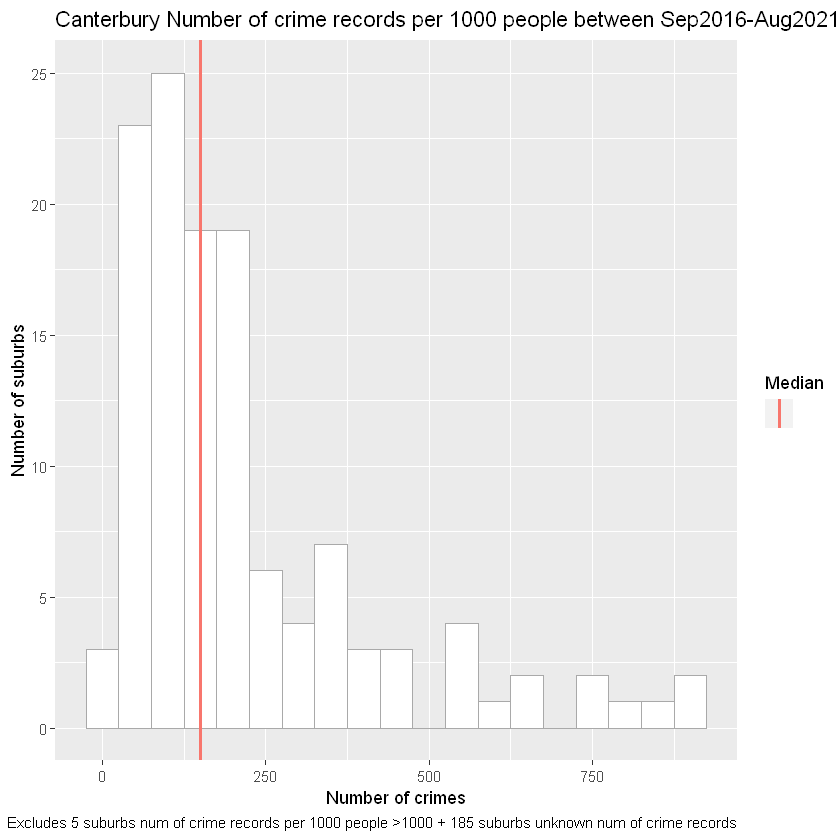

In [23]:
crimes_population %>% 
    filter(Num_of_Crimes_per_1000_People != 'NA') %>% 
    filter(Num_of_Crimes_per_1000_People < 1000) %>% 
    ggplot(aes(x=Num_of_Crimes_per_1000_People)) + geom_histogram(color = "darkgrey", fill = "white", 
                                                 binwidth = 50) +
    labs(x = "Number of crimes", y = "Number of suburbs", title = "Canterbury Number of crime records per 1000 people between Sep2016-Aug2021",
        caption = "Excludes 5 suburbs num of crime records per 1000 people >1000 + 185 suburbs unknown num of crime records")  +
 geom_vline(aes(xintercept = median(Num_of_Crimes_per_1000_People, na.rm = TRUE), color = ''), show.legend = TRUE, size = 1) +
  guides(color=guide_legend("Median"))

Calculate median number of crimes per 1000 people in Canterbury per suburb (removing missing values).

In [24]:
median(crimes_population$Num_of_Crimes_per_1000_People, na.rm = TRUE)

[1] 156.4611